In [1]:
import pandas as pd

import numpy as np

from collections import Counter

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
def descriptive_statistics(data):
    data = np.array(data)

    print("Mean: ", data.mean())
    print("Min: ", data.min())
    print("Max: ", data.max())

    print("Median: ", np.median(data))
    print("SD: ", np.std(data, ddof=1))
    print("Lower quantile: ", np.quantile(data, 0.025))
    print("Upper quantile: ", np.quantile(data, 0.975))




In [3]:
df = pd.read_csv("../../data/cleaned_filtered_dataset_nans.csv")

In [4]:
len(df)

398827

In [5]:
winners = df["Winner"].tolist()
losers = df["Loser"].tolist()

In [6]:
teams = set(winners) | set(losers)

In [7]:
len(teams)

16912

In [8]:
winner_count = Counter(winners)

In [9]:
loser_count = Counter(losers)

In [10]:
win_loss_ratio = dict()

In [11]:
for key in winner_count:
    win_loss_ratio[key] = winner_count[key]/(winner_count[key] + loser_count[key])

In [12]:
total_games = dict()
for key in winner_count:
    total_games[key] = winner_count[key] + loser_count[key]

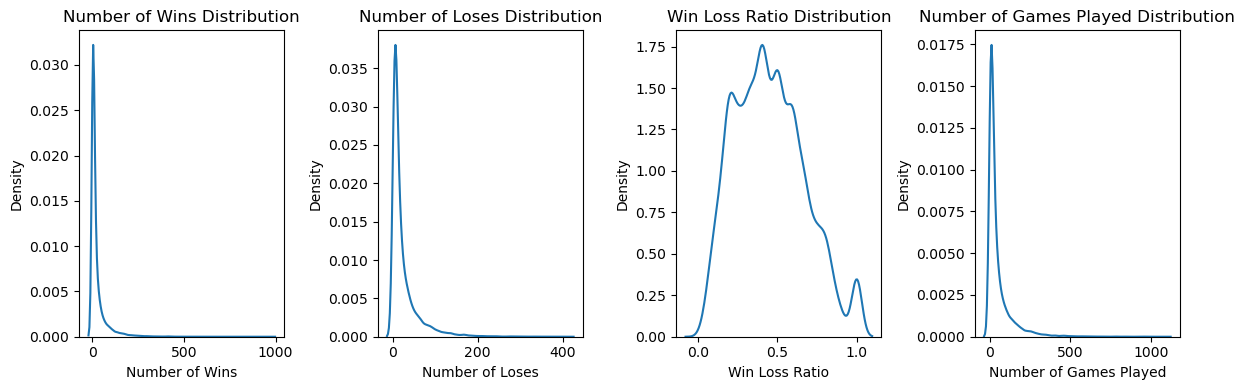

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

sns.kdeplot(data = list(winner_count.values()), ax=axs[0])
sns.kdeplot(data = list(loser_count.values()), ax=axs[1])
sns.kdeplot(data = list(win_loss_ratio.values()), ax=axs[2])
sns.kdeplot(data = list(total_games.values()), ax=axs[3])

axs[0].set_xlabel("Number of Wins")
axs[0].set_ylabel("Density")
axs[0].set_title("Number of Wins Distribution")

axs[1].set_xlabel("Number of Loses")
axs[1].set_ylabel("Density")
axs[1].set_title("Number of Loses Distribution")

axs[2].set_xlabel("Win Loss Ratio")
axs[2].set_ylabel("Density")
axs[2].set_title("Win Loss Ratio Distribution")


axs[3].set_xlabel("Number of Games Played")
axs[3].set_ylabel("Density")
axs[3].set_title("Number of Games Played Distribution")


fig.tight_layout()

In [18]:
descriptive_statistics(list(win_loss_ratio.values()))

Mean:  0.4531795816678733
Min:  0.017241379310344827
Max:  1.0
Median:  0.4318181818181818
SD:  0.21998178137399121
Lower quantile:  0.1
Upper quantile:  1.0


In [19]:
descriptive_statistics(list(winner_count.values()))

Mean:  26.021204410517388
Min:  1
Max:  975
Median:  8.0
SD:  50.08497288845249
Lower quantile:  1.0
Upper quantile:  167.0


In [20]:
descriptive_statistics(list(loser_count.values()))

Mean:  24.178660200060623
Min:  1
Max:  411
Median:  11.0
SD:  35.09705271839834
Lower quantile:  1.0
Upper quantile:  125.0


In [21]:
descriptive_statistics(list(total_games.values()))

Mean:  51.40014353754812
Min:  1
Max:  1085
Median:  21.0
SD:  80.28109176110503
Lower quantile:  4.0
Upper quantile:  278.0


# Graph Visualization (Uses external tool cosmograph)

In [ ]:
pd.DataFrame({"source" : winners, "target": losers}).to_csv("../../data/graph.csv", index=False)